In [2]:
%%capture
!python3 -m pip install nba_api

In [9]:

import pandas as pd
from nba_api.stats.endpoints import boxscorescoringv2
from nba_api.stats.static import teams

nba_teams = teams.get_teams()
# Select the dictionary for the Celtics, which contains their team ID
celtics = [team for team in nba_teams if team['abbreviation'] == 'BOS'][0]
celtics_id = celtics['id']

In [26]:
all_nba_teams = [team['id'] for team in nba_teams]
print(len(all_nba_teams))

30


In [28]:
from nba_api.stats.endpoints import leaguegamefinder

df = pd.DataFrame()
min_season = 2023
for team_id in all_nba_teams:
    gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id)
    # The first DataFrame of those returned is what we want.
    games = gamefinder.get_data_frames()[0]
    games = games[games['GAME_ID'].apply(lambda x: x.startswith('002'))]
    if games['SEASON_ID'].astype(int).min() < min_season:
        min_season = games['SEASON_ID'].astype(int).min()
    df = pd.concat([df, games], axis=0, ignore_index=True)

df = df.reset_index()
df = df[df['SEASON_ID'].astype(int) >= min_season]
df

,index,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,0,22022,1610612737,ATL,Atlanta Hawks,0022201216,2023-04-09,ATL @ BOS,L,241,...,0.789,16.0,34.0,50.0,27,11.0,5,9,12,-6.0
1,1,22022,1610612737,ATL,Atlanta Hawks,0022201205,2023-04-07,ATL vs. PHI,L,264,...,0.679,4.0,34.0,38.0,32,11.0,7,20,19,-5.0
2,2,22022,1610612737,ATL,Atlanta Hawks,0022201191,2023-04-05,ATL vs. WAS,W,239,...,0.875,12.0,36.0,48.0,30,10.0,5,16,23,18.0
3,3,22022,1610612737,ATL,Atlanta Hawks,0022201182,2023-04-04,ATL @ CHI,W,241,...,0.895,7.0,41.0,48.0,26,5.0,7,16,18,18.0
4,4,22022,1610612737,ATL,Atlanta Hawks,0022201167,2023-04-02,ATL vs. DAL,W,264,...,0.818,16.0,37.0,53.0,28,10.0,3,9,22,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90849,90849,21988,1610612766,CHH,Charlotte Hornets,0028800062,1988-11-12,CHH @ ATL,L,238,...,0.813,14.0,21.0,35.0,30,12.0,2,19,26,NaN
90850,90850,21988,1610612766,CHH,Charlotte Hornets,0028800052,1988-11-11,CHH @ WAS,L,240,...,0.760,11.0,32.0,43.0,22,9.0,1,23,26,NaN
90851,90851,21988,1610612766,CHH,Charlotte Hornets,0028800024,1988-11-08,CHH vs. LAC,W,240,...,0.738,17.0,38.0,55.0,28,9.0,1,17,31,NaN
90852,90852,21988,1610612766,CHH,Charlotte Hornets,0028800015,1988-11-05,CHH @ DET,L,240,...,1.000,21.0,19.0,40.0,18,8.0,6,11,21,NaN


In [33]:
df[df['SEASON_ID'] == '22022']

,index,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,0,22022,1610612737,ATL,Atlanta Hawks,0022201216,2023-04-09,ATL @ BOS,L,241,...,0.789,16.0,34.0,50.0,27,11.0,5,9,12,-6.0
1,1,22022,1610612737,ATL,Atlanta Hawks,0022201205,2023-04-07,ATL vs. PHI,L,264,...,0.679,4.0,34.0,38.0,32,11.0,7,20,19,-5.0
2,2,22022,1610612737,ATL,Atlanta Hawks,0022201191,2023-04-05,ATL vs. WAS,W,239,...,0.875,12.0,36.0,48.0,30,10.0,5,16,23,18.0
3,3,22022,1610612737,ATL,Atlanta Hawks,0022201182,2023-04-04,ATL @ CHI,W,241,...,0.895,7.0,41.0,48.0,26,5.0,7,16,18,18.0
4,4,22022,1610612737,ATL,Atlanta Hawks,0022201167,2023-04-02,ATL vs. DAL,W,264,...,0.818,16.0,37.0,53.0,28,10.0,3,9,22,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88300,88300,22022,1610612766,CHA,Charlotte Hornets,0022200071,2022-10-28,CHA @ ORL,L,239,...,0.667,10.0,37.0,47.0,21,3.0,4,14,18,-20.0
88301,88301,22022,1610612766,CHA,Charlotte Hornets,0022200058,2022-10-26,CHA @ NYK,L,265,...,0.667,9.0,33.0,42.0,31,9.0,5,15,24,-3.0
88302,88302,22022,1610612766,CHA,Charlotte Hornets,0022200038,2022-10-23,CHA @ ATL,W,240,...,0.700,14.0,38.0,52.0,28,7.0,6,13,24,17.0
88303,88303,22022,1610612766,CHA,Charlotte Hornets,0022200017,2022-10-21,CHA vs. NOP,L,239,...,0.786,11.0,26.0,37.0,30,9.0,4,13,24,-12.0


In [47]:
game_lvl = df.groupby(['SEASON_ID', 'GAME_ID'])['PTS'].sum().reset_index()
grouped = game_lvl.groupby(['SEASON_ID'])[['GAME_ID', 'PTS']].agg({'GAME_ID': 'count', 'PTS': 'median'}).reset_index()
grouped

,SEASON_ID,GAME_ID,PTS
0,21983,943,219.0
1,21984,943,221.0
2,21985,943,221.0
3,21986,943,219.0
4,21987,943,216.0
5,21988,1025,218.0
6,21989,1107,213.0
7,21990,1107,210.0
8,21991,1107,210.0
9,21992,1107,209.0


/var/folders/kn/3gxxlz990_32dc43rfrm6vlm0000gn/T/ipykernel_15509/2995061900.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


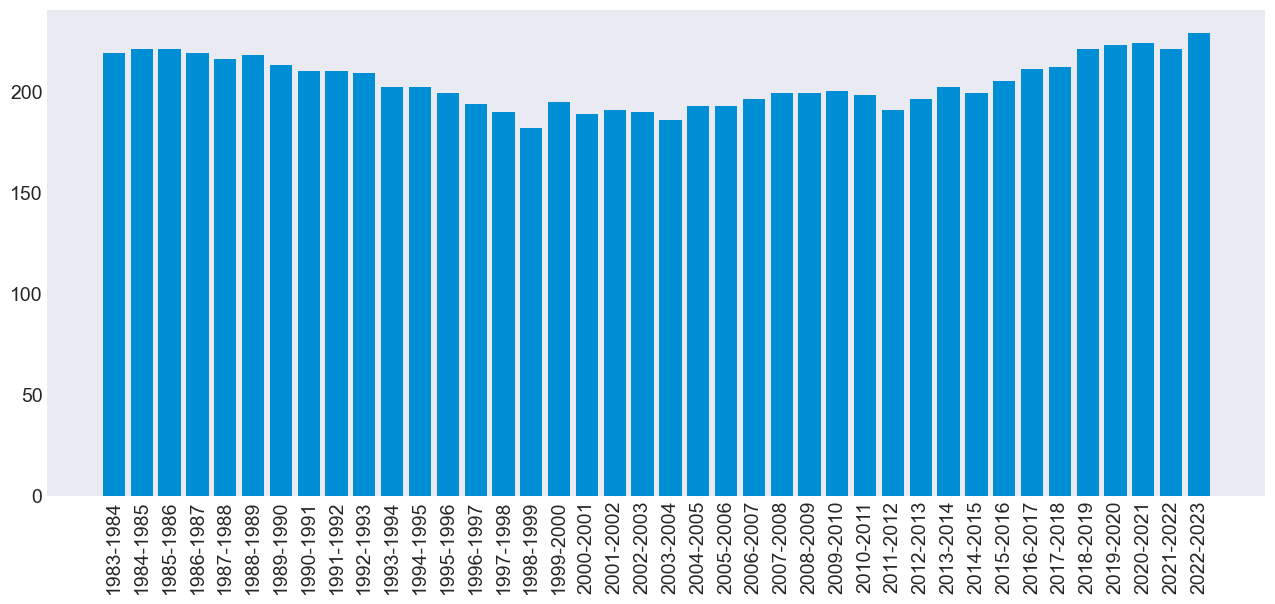

In [48]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
fig = plt.figure(figsize=(14,6))
plt.bar(grouped['SEASON_ID'].apply(lambda x: x[1:] + "-" + str(int(x[1:])+1)), grouped['PTS'])
plt.xticks(rotation=90);
plt.grid(visible=False)